<a href="https://colab.research.google.com/github/ELCalvin14/abremeana.github.io/blob/main/tensor2tensor/notebooks/IAemotional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np

# Supongamos que tienes los datos de entrada (diagnósticos emocionales) y salida (estados emocionales) de tus usuarios
# en las listas input_data y output_data respectivamente.

# Estructura de ejemplo para los datos
input_data = [
    [1, 2, 3, 4, 5, 4, 3],  # Usuario 1
    [2, 3, 4, 5, 4, 3, 2],  # Usuario 2
    [3, 4, 5, 4, 3, 2, 1],  # Usuario 3
    [5, 4, 3, 2, 1, 2, 3],  # Usuario 4
    [4, 5, 4, 3, 2, 3, 4],  # Usuario 5
    [2, 1, 3, 2, 4, 5, 4],  # Usuario 6
    [3, 5, 4, 2, 3, 1, 4],  # Usuario 7
    [4, 2, 3, 1, 4, 5, 2],  # Usuario 8
    [5, 3, 2, 4, 1, 3, 5],  # Usuario 9
    [1, 3, 4, 2, 5, 4, 1]   # Usuario 10
]

output_data = [
    [0, 1, 0, 0, 0],  # Estado emocional para Usuario 1
    [0, 0, 1, 0, 0],  # Estado emocional para Usuario 2
    [0, 0, 0, 1, 0],  # Estado emocional para Usuario 3
    [0, 1, 0, 0, 0],  # Estado emocional para Usuario 4
    [0, 0, 0, 0, 1],  # Estado emocional para Usuario 5
    [0, 0, 0, 1, 0],  # Estado emocional para Usuario 6
    [0, 0, 0, 0, 1],  # Estado emocional para Usuario 7
    [0, 1, 0, 0, 0],  # Estado emocional para Usuario 8
    [0, 0, 0, 1, 0],  # Estado emocional para Usuario 9
    [0, 0, 0, 0, 1]   # Estado emocional para Usuario 10
]

# Convertir los datos a arrays de NumPy
input_data = np.array(input_data, dtype=float)
output_data = np.array(output_data, dtype=float)

# Crear el modelo
capa = tf.keras.layers.Dense(units=5, activation='softmax')  # 5 estados emocionales
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[7]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    capa
    ])

# Compilar el modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='categorical_crossentropy',  # Usar la entropía cruzada categórica para problemas de clasificación multiclase
    metrics=['accuracy']
)


In [43]:
# Comenzar el entrenamiento
print('Comenzando entrenamiento...')
historial = modelo.fit(input_data, output_data, epochs=1000, verbose=False)
print('Modelo Entrenado!')

Comenzando entrenamiento...
Modelo Entrenado!


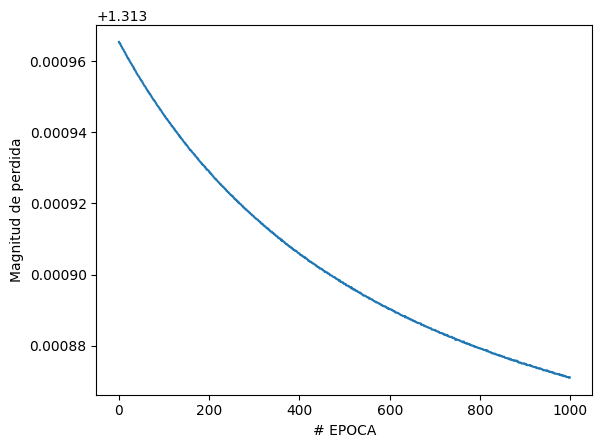

In [44]:
import matplotlib.pyplot as plt
plt.xlabel("# EPOCA")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [45]:
# Ahora puedes utilizar el modelo entrenado para hacer predicciones basadas en los últimos 7 diagnósticos emocionales de un usuario.
# Por ejemplo, supongamos que tienes nuevos datos de diagnósticos emocionales para un usuario en la lista new_input_data.
new_input_data = np.array([[3, 3, 3, 3, 3, 3, 3]])  # Ejemplo de nuevos diagnósticos emocionales

# Realizar la predicción
prediccion = modelo.predict(new_input_data)

# La predicción te dará las probabilidades para cada estado emocional, puedes tomar el estado con la probabilidad más alta como la predicción final.
estado_emocional_predicho = np.argmax(prediccion, axis=1)

print('Predicción de estado emocional:', estado_emocional_predicho)

1/1 [==============================] - 0s 38ms/step
Predicción de estado emocional: [1]
